In [1]:
import os

from lvmdrp.utils.examples import get_frames_metadata

from lvmdrp.functions import imageMethod
from lvmdrp.functions import rssMethod

/home/mejia/Downloads/home/mejia/.local/bin/miniconda3/envs/lvmdrp/lib/python3.8/site-packages/rascal/calibrator.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = os.path.join("data")
os.makedirs(output_path, exist_ok=True)

# create processed frames path template
out_path = os.path.join(output_path, "lvm-{kind}-{camera}-{expnum}.{ext}")

# extract metadata
frames_table = get_frames_metadata(path=os.path.join(data_path, "sim_2d"))
# group by imagetyp, camera and exptime
frames_table = frames_table.group_by(["imagetyp", "spec", "camera", "expnum", "exptime"])
# define groups and unique categories in those groups
frames_groups = frames_table.groups
unique_groups = frames_groups.keys

[INFO]: loading cached metadata from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/sim_2d/frames_table.pkl'


imagetyp spec camera  expnum  exptime                                          path                                        
-------- ---- ------ -------- ------- -------------------------------------------------------------------------------------
    flat  sp1     b1 00001002    10.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/sim_2d/sdR-b1-00001002.fits.gz
    flat  sp1     r1 00001002    10.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/sim_2d/sdR-r1-00001002.fits.gz
    flat  sp1     z1 00001002    10.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/sim_2d/sdR-z1-00001002.fits.gz
646 Fibers found


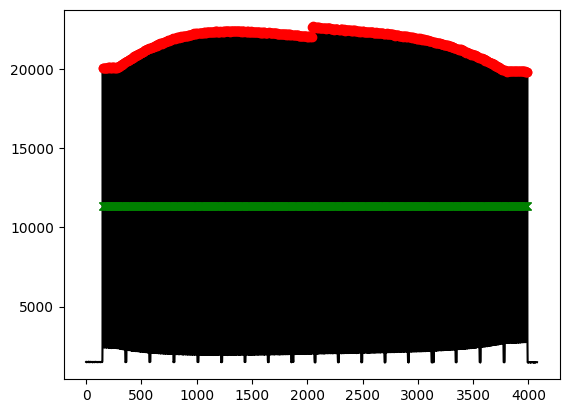

646 Fibers found


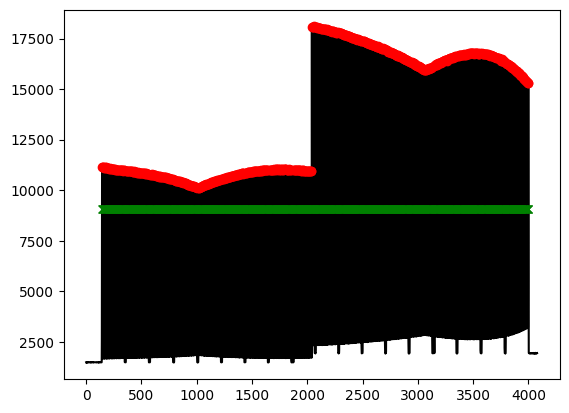

646 Fibers found


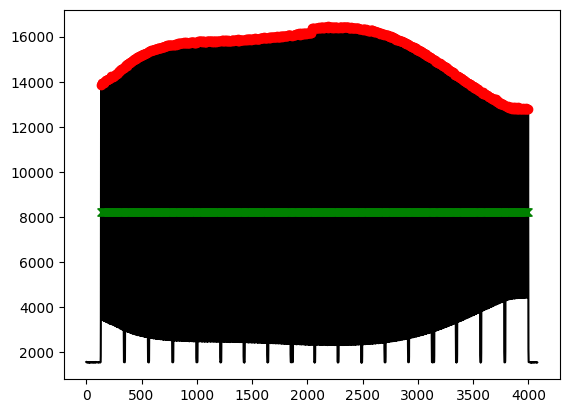

[WARNING]: divide by zero encountered in divide (RuntimeWarning)


In [3]:
fiberflats = frames_groups[(unique_groups["imagetyp"]=="flat")&(unique_groups["spec"]=="sp1")&(unique_groups["expnum"]=="00001002")]
print(fiberflats)

for fiberflat_frame in fiberflats:
    fiberflat_path = fiberflat_frame["path"]
    fiberflat_camera, fiberflat_expnum = fiberflat_frame["camera"], fiberflat_frame["expnum"]

    imageMethod.findPeaksAuto_drp(
        in_image=out_path.format(kind="cfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        out_peaks=out_path.format(kind="peaks", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="txt"),
        nfibers=0, slice='', threshold=3000, method="hyperbolic", median_box=0, median_cross=0, verbose=True
    )

    imageMethod.tracePeaks_drp(
        in_image=out_path.format(kind="cfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        out_trace=out_path.format(kind="trace", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        in_peaks=out_path.format(kind="peaks", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="txt"),
        steps=30, coadd=30, threshold_peak=3000, max_diff=2, method="hyperbolic", median_box=0, median_cross=0, verbose=True
    )

    imageMethod.extractSpec_drp(
        in_image=out_path.format(kind="cfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        out_rss=out_path.format(kind="xfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        in_trace=out_path.format(kind="trace", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        method="aperture", aperture=5, plot=1, parallel="auto"
    )